In [1]:
import numpy as np
import matplotlib.pyplot as pt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D, proj3d

In [2]:
def numericalGrad(funObj,w,epsilon):
    m=w.shape
    grad=np.zeros(m)
    for i in range(m[0]):
        wp=np.copy(w)
        wn=np.copy(w)
        wp[i] = w[i] + epsilon
        wn[i] = w[i] - epsilon
        grad[i] = (funObj(wp[0],wp[1])-funObj(wn[0],wn[1]))/(2*epsilon)
    return grad

In [3]:
def Gradient_Descent_Momentum(f, x,grad_f, alpha,beta, steps=50):
    count = 0
    tolerance = 1e-7 * np.ones(x.shape)
    x_k = np.array([x])  # Initialize with x as the first element
    v_k=np.zeros(x.shape)
    while count < steps:
        gradient = grad_f(x_k[-1][0], x_k[-1][1])   # Compute gradient at the last element of x_k
        v_k_1=beta*v_k - alpha * gradient
        x_k_1 = x_k[-1] + v_k_1
        x_k = np.concatenate((x_k, [x_k_1]),axis=0)  # Append the new point to x_k
        v_k=v_k_1
        if np.linalg.norm(x_k_1 - x_k[-2]) < np.linalg.norm(tolerance):
            break
        count += 1    
    return x_k

In [4]:
def Nesterov_Accelerated_Gradient_Descent(f, x,grad_f, alpha,beta, steps=50):
    count = 0
    tolerance = 1e-7 * np.ones(x.shape)
    x_k = np.array([x])  # Initialize with x as the first element
    v_k=np.zeros(x.shape)
    while count < steps:
        gradient = grad_f(x_k[-1][0]+beta*v_k[0], x_k[-1][1]+beta*v_k[1])   # Compute gradient at the last element of x_k
        v_k_1=beta*v_k - alpha * gradient
        x_k_1 = x_k[-1] + v_k_1
        x_k = np.concatenate((x_k, [x_k_1]),axis=0)  # Append the new point to x_k
        v_k=v_k_1
        if np.linalg.norm(x_k_1 - x_k[-2]) < np.linalg.norm(tolerance):
            break
        count += 1    
    return x_k

In [5]:
def ADAGRAD(f, x,grad_f,alpha, steps=50):
    count = 0
    beta = 1e-7
    tolerance = 1e-7 * np.ones(x.shape)
    x_k = np.array([x])  # Initialize with x as the first element
    r_k=np.zeros(x.shape)
    while count < steps:
        gradient = grad_f(x_k[-1][0], x_k[-1][1])   # Compute gradient at the last element of x_k
        r_k_1=r_k + gradient * gradient
        x_k_1 = x_k[-1] - (alpha/(beta+np.sqrt(r_k_1)))*gradient
        x_k = np.concatenate((x_k, [x_k_1]),axis=0)  # Append the new point to x_k
        r_k=r_k_1
        if np.linalg.norm(x_k_1 - x_k[-2]) < np.linalg.norm(tolerance):
            break
        count += 1    
    return x_k

In [6]:
def RMSPROP(f, x, grad_f,alpha,rho, steps=50):
    count = 0
    beta = 1e-7
    tolerance = 1e-7 * np.ones(x.shape)
    x_k = np.array([x])  # Initialize with x as the first element
    r_k=np.zeros(x.shape)
    while count < steps:
        gradient = grad_f(x_k[-1][0], x_k[-1][1])   # Compute gradient at the last element of x_k
        r_k_1=rho*r_k + (1-rho) * gradient * gradient
        x_k_1 = x_k[-1] - (alpha/(beta+np.sqrt(r_k_1)))*gradient
        x_k = np.concatenate((x_k, [x_k_1]),axis=0)  # Append the new point to x_k
        r_k=r_k_1
        if np.linalg.norm(x_k_1 - x_k[-2]) < np.linalg.norm(tolerance):
            break
        count += 1    
    return x_k

In [7]:
def ADAM_without_Bias(f, x,grad_f, alpha,beta_1=0.9,beta_2=0.999, steps=50):
    count = 0
    beta = 1e-7
    tolerance = 1e-7 * np.ones(x.shape)
    x_k = np.array([x])  # Initialize with x as the first element
    r_k = np.zeros(x.shape)
    v_k = np.zeros(x.shape)
    while count < steps:
        gradient = grad_f(x_k[-1][0], x_k[-1][1])  # Compute gradient at the last element of x_k
        v_k_1=beta_1*v_k+(1-beta_1)*gradient
        r_k_1=beta_2*r_k + (1-beta_2) * gradient * gradient
        x_k_1 = x_k[-1] - (alpha/(beta+np.sqrt(r_k_1)))*v_k_1
        x_k = np.concatenate((x_k, [x_k_1]),axis=0)  # Append the new point to x_k
        r_k=r_k_1
        v_k=v_k_1
        if np.linalg.norm(x_k_1 - x_k[-2]) < np.linalg.norm(tolerance):
            break
        count += 1    
    return x_k

In [8]:
def ADAM_with_Bias(f, x,grad_f, alpha,beta_1=0.9,beta_2=0.999, steps=50):
    count = 0
    beta = 1e-7
    tolerance = 1e-7 * np.ones(x.shape)
    x_k = np.array([x])  # Initialize with x as the first element
    r_k = np.zeros(x.shape)
    v_k = np.zeros(x.shape)
    t=1
    while count < steps:
        gradient = grad_f(x_k[-1][0], x_k[-1][1])  # Compute gradient at the last element of x_k
        v_k_1=beta_1*v_k+(1-beta_1)*gradient
        r_k_1=beta_2*r_k + (1-beta_2) * gradient * gradient
        v_k_cap=v_k_1/(1-beta_1**t)
        r_k_cap=r_k_1/(1-beta_2**t)
        x_k_1 = x_k[-1] - (alpha/(beta+np.sqrt(r_k_cap)))*v_k_cap
        x_k = np.concatenate((x_k, [x_k_1]),axis=0)  # Append the new point to x_k
        r_k=r_k_1
        v_k=v_k_1
        t+=1
        if np.linalg.norm(x_k_1 - x_k[-2]) < np.linalg.norm(tolerance):
            break
        count += 1    
    return x_k

In [25]:
def Gradient_Descent(f, x,Gradient, alpha, steps=50):
    count = 0
    tolerance = 1e-8 * np.ones(x.shape)
    x_k = np.array([x])  # Initialize with x as the first element
    while count < steps:
        gradient = Gradient(x_k[-1][0], x_k[-1][1])  # Compute gradient at the last element of x_k
        x_k_1 = x_k[-1] - alpha * gradient
        x_k = np.concatenate((x_k, [x_k_1]),axis=0)  # Append the new point to x_k
        if np.linalg.norm(x_k_1 - x_k[-2]) < np.linalg.norm(tolerance):
            break
        count += 1    
    return x_k

In [19]:
def f(X,Y):
    return (X**2+Y**2)

In [20]:
def grad_f(X,Y):
    return np.array([2*X,2*Y])

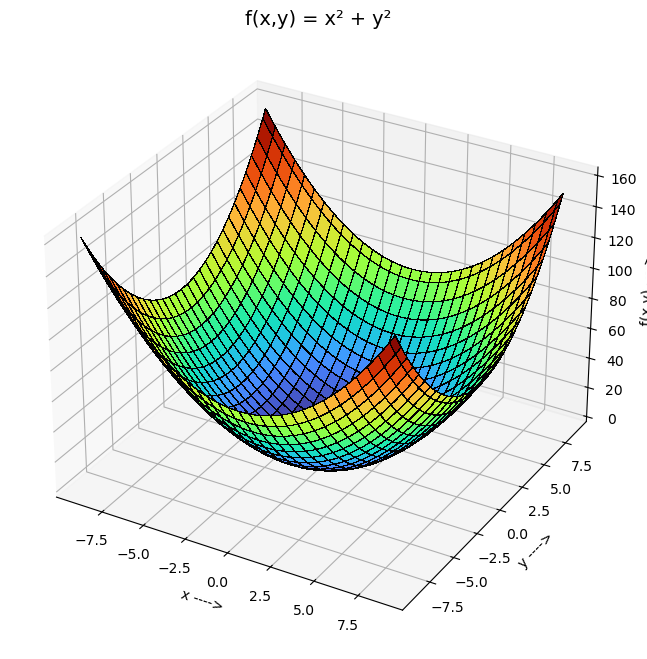

In [21]:
x=np.arange(-9,9,0.3)
y=np.arange(-9,9,0.3)
X,Y=np.meshgrid(x,y)
Z=f(X,Y)
# Plot the surface
fig = pt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap="turbo",edgecolor='k',linewidth=0.1, antialiased=False)
ax.set_xlabel('x ---->')
ax.set_ylabel('y ---->')
ax.set_zlabel('f(x,y) ---->')
ax.set_title('f(x,y) = x² + y²',size=14)

# Set grid to dotted
ax.grid(True)

pt.show()

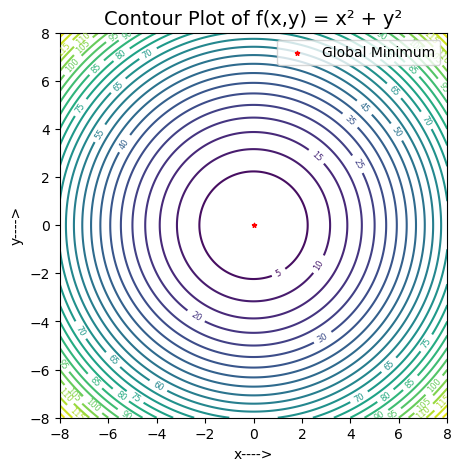

In [22]:
x = np.linspace(-8, 8, 300)
y = np.linspace(-8, 8, 300)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot the contour plot with increased density of lines
fig=pt.figure(figsize=(5, 5))
contour = pt.contour(X, Y, Z, cmap="viridis",levels=30)  # Set the number of levels to increase density
pt.xlabel('x---->')
pt.ylabel('y---->')
pt.title('Contour Plot of f(x,y) = x² + y²',size=14)
pt.scatter(0,0,label="Global Minimum",marker='*',s=10,color="red")
pt.clabel(contour, inline=True, fontsize=6)
# Set x and y ticks
pt.xticks([-8,-6, -4, -2, 0, 2, 4, 6,8])
pt.yticks([-8,-6, -4, -2, 0, 2, 4, 6,8])
pt.legend()
pt.show()

In [29]:
#for slider for various hyperparameter values
from ipywidgets import interactive, FloatSlider
import ipywidgets as widgets

def visualize_gradient_descent(x_start,y_start,alpha_mome,alpha_ada,alpha_adam,beta=0.8,rho=0.25,beta_1=0.9,beta_2=0.999):
    start_point=np.array([x_start,y_start])
    pt.figure(figsize=(15,15))

    #gradient Descent
    gd_ = Gradient_Descent(f,start_point,grad_f, alpha_mome,1000) 
    pt.scatter(gd_[:,0], gd_[:,1], color="pink", s=10, marker='o')
    pt.plot(gd_[:, 0], gd_[:, 1], color="pink", label=f"grad_descent: {gd_[:, 0].shape[0]-1} steps")
    
    #gradient Descent with Momentum

    gd_momentum = Gradient_Descent_Momentum(f,start_point,grad_f, alpha_mome, beta,1000) 
    pt.scatter(gd_momentum[:,0], gd_momentum[:,1], color="red", s=10, marker='o')
    pt.plot(gd_momentum[:, 0], gd_momentum[:, 1], color="red", label=f"grad_descent with momentum:{gd_momentum[:, 0].shape[0]-1} steps")

    #Nesterov Accelerated gradient Descent

    gd_nesterov=Nesterov_Accelerated_Gradient_Descent(f,start_point,grad_f,alpha_mome,beta,1000)
    pt.scatter(gd_nesterov[:,0], gd_nesterov[:,1], color="limegreen", s=10, marker='o')
    pt.plot(gd_nesterov[:, 0], gd_nesterov[:, 1], color="limegreen", label=f"Nesterov Accelerated grad_descent:{gd_nesterov[:, 0].shape[0]-1} steps")
    
    #ADAGRAD

    adagrad=ADAGRAD(f,start_point,grad_f,alpha_ada,1000)
    pt.scatter(adagrad[:,0], adagrad[:,1], color="orange", s=10, marker='o')
    pt.plot(adagrad[:, 0], adagrad[:, 1], color="orange", label=f"ADAGRAD:{adagrad[:, 0].shape[0]-1} steps")

    #RMSPROP

    rmsprop=RMSPROP(f,start_point,grad_f,alpha_ada,rho,1000)
    pt.scatter(rmsprop[:,0], rmsprop[:,1], color="blue", s=10, marker='o')
    pt.plot(rmsprop[:, 0], rmsprop[:, 1], color="blue", label=f"RMSPROP:{rmsprop[:, 0].shape[0]-1} steps")

    #ADAM(without bias)

    gd_adam_without_bias=ADAM_without_Bias(f,start_point,grad_f,alpha_adam,beta_1,beta_2,1000)
    pt.scatter(gd_adam_without_bias[:,0], gd_adam_without_bias[:,1], color="yellow", s=10, marker='o')
    pt.plot(gd_adam_without_bias[:, 0], gd_adam_without_bias[:, 1], color="yellow", label=f"ADAM_without_Bias:{gd_adam_without_bias[:, 0].shape[0]-1} steps")

    #ADAM(with bias)

    gd_adam_with_bias=ADAM_with_Bias(f,start_point,grad_f,alpha_adam,beta_1,beta_2,1000)
    pt.scatter(gd_adam_with_bias[:,0], gd_adam_with_bias[:,1], color="green", s=10, marker='o')
    pt.plot(gd_adam_with_bias[:, 0], gd_adam_with_bias[:, 1], color="green", label=f"ADAM_with_Bias:{gd_adam_with_bias[:, 0].shape[0]-1} steps")

    
    # Customize the plots
    pt.xlabel('x---->')
    pt.ylabel('y---->')
    pt.legend(fontsize='small', loc="upper right")
    pt.title("GD Algorithms on f(x,y) = x² + y²")
    # Plot the contour plot
    x = np.linspace(-10, 10, 300)
    y = np.linspace(-10, 10, 300)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    contour = pt.contour(X, Y, Z, cmap="viridis",levels=25)
    pt.clabel(contour, inline=True, fontsize=6, fmt='%.1f', colors='black')
    # Show the plots
    pt.tight_layout()
    pt.show()

# Create interactive widgets for c1 and rho
x_start=FloatSlider(value=2, min=-5, max=5, step=0.1, description='x₀:')
y_start=FloatSlider(value=3, min=-8, max=8, step=0.1, description='y₀:')
alphaMomentum_slider = FloatSlider(value=0.5, min=0.01, max=1, step=0.01, description='⍺_momentum:')
beta_slider = FloatSlider(value=0.1, min=0, max=1, step=0.01, description='β:')
alphaAdagrad_slider = FloatSlider(value=0.5, min=0.01, max=1, step=0.01, description='⍺_adagrad:')
rho_slider = FloatSlider(value=0.9, min=0, max=1, step=0.01, description='⍴:')
alphaAdam_slider = FloatSlider(value=0.5, min=0.01, max=1, step=0.01, description='⍺_adam:')
beta1_slider = FloatSlider(value=0.04, min=0, max=1, step=0.01, description='β₁:')
beta2_slider = FloatSlider(value=0.82, min=0, max=1, step=0.0001, description='β₂:')

# Create the interactive plot
interactive_plot = interactive(visualize_gradient_descent,alpha_mome=alphaMomentum_slider,alpha_ada=alphaAdagrad_slider,alpha_adam=alphaAdam_slider,x_start=x_start,y_start=y_start,beta=beta_slider,rho=rho_slider,beta_1=beta1_slider,beta_2=beta2_slider)
interactive_plot


interactive(children=(FloatSlider(value=2.0, description='x₀:', max=5.0, min=-5.0), FloatSlider(value=3.0, des…

##### Since given function is well conditioned so gradient descent with step size works equally good in comparison to others.
##### Nesterov Accelerated gradient descent works better in comparison to gradient descent with momentum as expected because of look-ahead gradient
##### same between RMSPROP and ADAGRAD : RMSPROP works better in comparison to ADAGRAD
##### ADAM with and without bias take almost same number of iterations.
##### In this case hyperparameter for momentum (beta and beta1) should be as low as possible as it is well conditioned function and if we take high previous momentum term it will possibly miss minima and has to take lot of turns which in turn results in more number of iterations

In [31]:
def f(X,Y):
    return (10*X**2+Y**2)

In [32]:
def grad_f(X,Y):
    return np.array([20*X,2*Y])

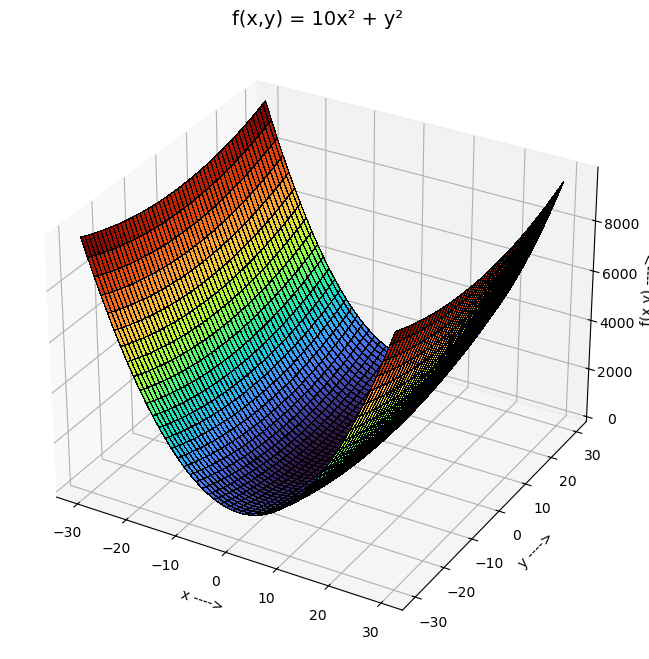

In [33]:
x=np.arange(-30,30,0.3)
y=np.arange(-30,30,0.3)
X,Y=np.meshgrid(x,y)
Z=f(X,Y)
# Plot the surface
fig = pt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap="turbo",edgecolor='k',linewidth=0.1, antialiased=False)
ax.set_xlabel('x ---->')
ax.set_ylabel('y ---->')
ax.set_zlabel('f(x,y) ---->')
ax.set_title('f(x,y) = 10x² + y²',size=14)

# Set grid to dotted
ax.grid(True)

pt.show()

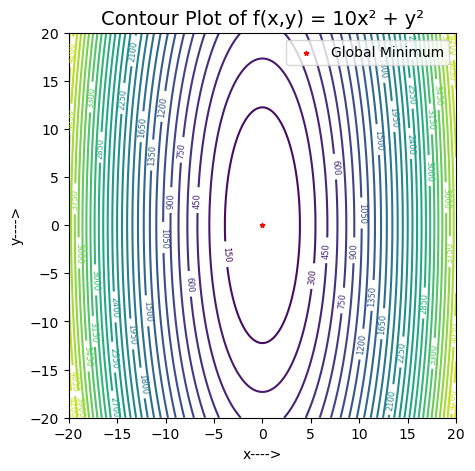

In [34]:
x = np.linspace(-20, 20, 300)
y = np.linspace(-20, 20, 300)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot the contour plot with increased density of lines
fig=pt.figure(figsize=(5, 5))
contour = pt.contour(X, Y, Z, cmap="viridis",levels=30)  # Set the number of levels to increase density
pt.xlabel('x---->')
pt.ylabel('y---->')
pt.title('Contour Plot of f(x,y) = 10x² + y²',size=14)
pt.scatter(0,0,label="Global Minimum",marker='*',s=10,color="red")
pt.clabel(contour, inline=True, fontsize=6)
# # Set x and y ticks
# pt.xticks([-8,-6, -4, -2, 0, 2, 4, 6,8])
# pt.yticks([-8,-6, -4, -2, 0, 2, 4, 6,8])
pt.legend()
pt.show()

In [38]:
#for slider for various hyperparameter values
from ipywidgets import interactive, FloatSlider
import ipywidgets as widgets

def visualize_gradient_descent(x_start,y_start,alpha_mome,alpha_ada,alpha_adam,beta=0.8,rho=0.25,beta_1=0.9,beta_2=0.999):
    start_point=np.array([x_start,y_start])
    pt.figure(figsize=(15,15))

    #gradient Descent
    gd_ = Gradient_Descent(f,start_point,grad_f, alpha_mome,1000) 
    pt.scatter(gd_[:,0], gd_[:,1], color="pink", s=10, marker='o')
    pt.plot(gd_[:, 0], gd_[:, 1], color="pink", label=f"grad_descent: {gd_[:, 0].shape[0]-1} steps")
    
    #gradient Descent with Momentum

    gd_momentum = Gradient_Descent_Momentum(f,start_point,grad_f, alpha_mome, beta,1000) 
    pt.scatter(gd_momentum[:,0], gd_momentum[:,1], color="red", s=10, marker='o')
    pt.plot(gd_momentum[:, 0], gd_momentum[:, 1], color="red", label=f"grad_descent with momentum:{gd_momentum[:, 0].shape[0]-1} steps")

    #Nesterov Accelerated gradient Descent

    gd_nesterov=Nesterov_Accelerated_Gradient_Descent(f,start_point,grad_f,alpha_mome,beta,1000)
    pt.scatter(gd_nesterov[:,0], gd_nesterov[:,1], color="limegreen", s=10, marker='o')
    pt.plot(gd_nesterov[:, 0], gd_nesterov[:, 1], color="limegreen", label=f"Nesterov Accelerated grad_descent:{gd_nesterov[:, 0].shape[0]-1} steps")
    
    #ADAGRAD

    adagrad=ADAGRAD(f,start_point,grad_f,alpha_ada,1000)
    pt.scatter(adagrad[:,0], adagrad[:,1], color="orange", s=10, marker='o')
    pt.plot(adagrad[:, 0], adagrad[:, 1], color="orange", label=f"ADAGRAD:{adagrad[:, 0].shape[0]-1} steps")

    #RMSPROP

    rmsprop=RMSPROP(f,start_point,grad_f,alpha_ada,rho,1000)
    pt.scatter(rmsprop[:,0], rmsprop[:,1], color="blue", s=10, marker='o')
    pt.plot(rmsprop[:, 0], rmsprop[:, 1], color="blue", label=f"RMSPROP:{rmsprop[:, 0].shape[0]-1} steps")

    #ADAM(without bias)

    gd_adam_without_bias=ADAM_without_Bias(f,start_point,grad_f,alpha_adam,beta_1,beta_2,1000)
    pt.scatter(gd_adam_without_bias[:,0], gd_adam_without_bias[:,1], color="yellow", s=10, marker='o')
    pt.plot(gd_adam_without_bias[:, 0], gd_adam_without_bias[:, 1], color="yellow", label=f"ADAM_without_Bias:{gd_adam_without_bias[:, 0].shape[0]-1} steps")

    #ADAM(with bias)

    gd_adam_with_bias=ADAM_with_Bias(f,start_point,grad_f,alpha_adam,beta_1,beta_2,1000)
    pt.scatter(gd_adam_with_bias[:,0], gd_adam_with_bias[:,1], color="green", s=10, marker='o')
    pt.plot(gd_adam_with_bias[:, 0], gd_adam_with_bias[:, 1], color="green", label=f"ADAM_with_Bias:{gd_adam_with_bias[:, 0].shape[0]-1} steps")

    
    # Customize the plots
    pt.xlabel('x---->')
    pt.ylabel('y---->')
    pt.legend(fontsize='small', loc="upper right")
    pt.title("GD Algorithms on f(x,y) = 10x² + y²")
    # Plot the contour plot
    x = np.linspace(-5, 5, 300)
    y = np.linspace(-10, 10, 300)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    contour = pt.contour(X, Y, Z, cmap="viridis",levels=25)
    pt.clabel(contour, inline=True, fontsize=6, fmt='%.1f', colors='black')
    # Show the plots
    pt.tight_layout()
    pt.show()

# Create interactive widgets for c1 and rho
x_start=FloatSlider(value=2, min=-5, max=5, step=0.1, description='x₀:')
y_start=FloatSlider(value=3, min=-8, max=8, step=0.1, description='y₀:')
alphaMomentum_slider = FloatSlider(value=0.06, min=0.01, max=1, step=0.01, description='⍺_momentum:')
beta_slider = FloatSlider(value=0.5, min=0, max=1, step=0.01, description='β:')
alphaAdagrad_slider = FloatSlider(value=0.63, min=0.01, max=1, step=0.01, description='⍺_adagrad:')
rho_slider = FloatSlider(value=0.9, min=0, max=1, step=0.01, description='⍴:')
alphaAdam_slider = FloatSlider(value=0.5, min=0.01, max=1, step=0.01, description='⍺_adam:')
beta1_slider = FloatSlider(value=0.5, min=0, max=1, step=0.01, description='β₁:')
beta2_slider = FloatSlider(value=0.99, min=0, max=1, step=0.0001, description='β₂:')

# Create the interactive plot
interactive_plot = interactive(visualize_gradient_descent,alpha_mome=alphaMomentum_slider,alpha_ada=alphaAdagrad_slider,alpha_adam=alphaAdam_slider,x_start=x_start,y_start=y_start,beta=beta_slider,rho=rho_slider,beta_1=beta1_slider,beta_2=beta2_slider)
interactive_plot


interactive(children=(FloatSlider(value=2.0, description='x₀:', max=5.0, min=-5.0), FloatSlider(value=3.0, des…

##### Since given function is ill conditioned so in this case Gradient Descent not perform better in comparison to its variants
##### GD with Momentum and Nesterov Accelerated gradient descent both works much better in comparison to Gradient Descent also Nestrov accelerated Gradient Descent shows faster convergence in comparison to GD with momentum because of evaluating gradient at "look-ahead" position
##### ADAGRAD and RMSPROP both shows improvement in comparison to Gradient Descent but RMSPROP shows much faster convergence as expected
##### ADAM with and without bias correction both shows improvement but ADAM without bias correction took less iterations compared to ADAM with bias correction as it is biased towards 0 which is also the minima

In [39]:
def f(X,Y):
    return (10*X**2-Y**2)

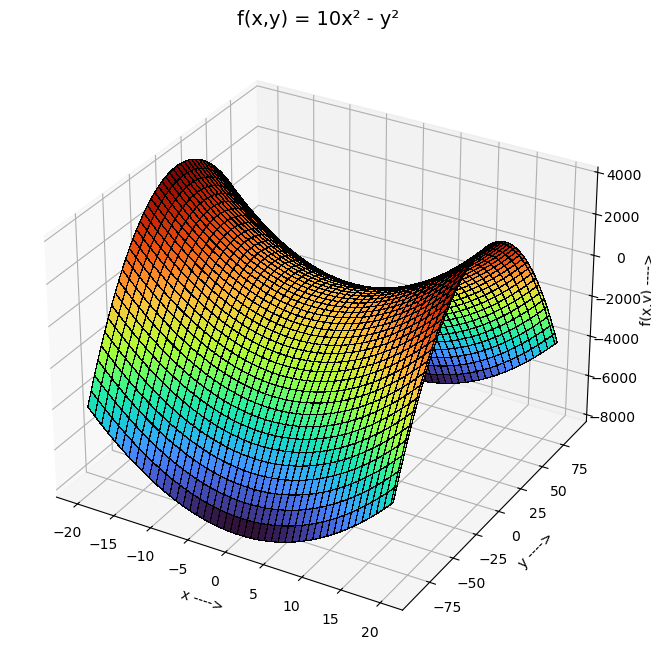

In [40]:
x=np.arange(-20,20,0.3)
y=np.arange(-90,90,0.3)
X,Y=np.meshgrid(x,y)
Z=f(X,Y)
# Plot the surface
fig = pt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap="turbo",edgecolor='k',linewidth=0.1, antialiased=False)
ax.set_xlabel('x ---->')
ax.set_ylabel('y ---->')
ax.set_zlabel('f(x,y) ---->')
ax.set_title('f(x,y) = 10x² - y²',size=14)

# Set grid to dotted
ax.grid(True)

pt.show()

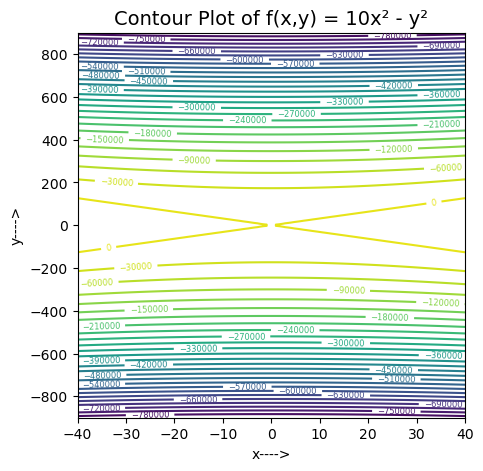

In [41]:
x = np.linspace(-40, 40, 300)
y = np.linspace(-900, 900, 300)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot the contour plot with increased density of lines
fig=pt.figure(figsize=(5, 5))
contour = pt.contour(X, Y, Z, cmap="viridis",levels=30)  # Set the number of levels to increase density
pt.xlabel('x---->')
pt.ylabel('y---->')
pt.title('Contour Plot of f(x,y) = 10x² - y²',size=14)
pt.clabel(contour, inline=True, fontsize=6)
# # Set x and y ticks
# pt.xticks([-8,-6, -4, -2, 0, 2, 4, 6,8])
# pt.yticks([-8,-6, -4, -2, 0, 2, 4, 6,8])
pt.show()

In [42]:
def grad_f(X,Y):
    return np.array([20*X,-2*Y])

In [80]:
#for slider for various hyperparameter values
from ipywidgets import interactive, FloatSlider
import ipywidgets as widgets

def visualize_gradient_descent(x_start,y_start,alpha_mome,alpha_ada,alpha_adam,beta=0.8,rho=0.25,beta_1=0.9,beta_2=0.999):
    start_point=np.array([x_start,y_start])
    pt.figure(figsize=(15,15))

    #gradient Descent
    gd_ = Gradient_Descent(f,start_point,grad_f, alpha_mome,150) 
    pt.scatter(gd_[:,0], gd_[:,1], color="black", s=10, marker='o')
    pt.plot(gd_[:, 0], gd_[:, 1], color="black", label=f"grad_descent: {gd_[:, 0].shape[0]-1} steps")

    #gradient Descent with Momentum

    gd_momentum = Gradient_Descent_Momentum(f,start_point,grad_f, alpha_mome, beta,140) 
    pt.scatter(gd_momentum[:,0], gd_momentum[:,1], color="red", s=10, marker='o')
    pt.plot(gd_momentum[:, 0], gd_momentum[:, 1], color="red", label=f"grad_descent with momentum:{gd_momentum[:, 0].shape[0]-1} steps")

    #Nesterov Accelerated gradient Descent

    gd_nesterov=Nesterov_Accelerated_Gradient_Descent(f,start_point,grad_f,alpha_mome,beta,135)
    pt.scatter(gd_nesterov[:,0], gd_nesterov[:,1], color="limegreen", s=10, marker='o')
    pt.plot(gd_nesterov[:, 0], gd_nesterov[:, 1], color="limegreen", label=f"Nesterov Accelerated grad_descent:{gd_nesterov[:, 0].shape[0]-1} steps")
    
    #ADAGRAD

    adagrad=ADAGRAD(f,start_point,grad_f,alpha_ada,2000)
    pt.scatter(adagrad[:,0], adagrad[:,1], color="orange", s=10, marker='o')
    pt.plot(adagrad[:, 0], adagrad[:, 1], color="orange", label=f"ADAGRAD:{adagrad[:, 0].shape[0]-1} steps")

    #RMSPROP

    rmsprop=RMSPROP(f,start_point,grad_f,alpha_ada,rho,2000)
    pt.scatter(rmsprop[:,0], rmsprop[:,1], color="blue", s=10, marker='o')
    pt.plot(rmsprop[:, 0], rmsprop[:, 1], color="blue", label=f"RMSPROP:{rmsprop[:, 0].shape[0]-1} steps")

    #ADAM(without bias)

    gd_adam_without_bias=ADAM_without_Bias(f,start_point,grad_f,alpha_adam,beta_1,beta_2,2000)
    pt.scatter(gd_adam_without_bias[:,0], gd_adam_without_bias[:,1], color="yellow", s=10, marker='o')
    pt.plot(gd_adam_without_bias[:, 0], gd_adam_without_bias[:, 1], color="yellow", label=f"ADAM_without_Bias:{gd_adam_without_bias[:, 0].shape[0]-1} steps")

    #ADAM(with bias)

    gd_adam_with_bias=ADAM_with_Bias(f,start_point,grad_f,alpha_adam,beta_1,beta_2,2000)
    pt.scatter(gd_adam_with_bias[:,0], gd_adam_with_bias[:,1], color="green", s=10, marker='o')
    pt.plot(gd_adam_with_bias[:, 0], gd_adam_with_bias[:, 1], color="green", label=f"ADAM_with_Bias:{gd_adam_with_bias[:, 0].shape[0]-1} steps")

    
    # Customize the plots
    pt.xlabel('x---->')
    pt.ylabel('y---->')
    pt.legend(fontsize='small', loc="upper right")
    pt.title("GD Algorithms")
    # Plot the contour plot
    x = np.linspace(-50, 50, 300)
    y = np.linspace(-400, 400, 300)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    contour = pt.contour(X, Y, Z, cmap="viridis",levels=25)
    pt.clabel(contour, inline=True, fontsize=6, fmt='%.1f', colors='black')
    # Show the plots
    pt.tight_layout()
    pt.show()

# Create interactive widgets for c1 and rho
x_start=FloatSlider(value=15, min=-30, max=30, step=0.1, description='x₀:')
y_start=FloatSlider(value=-0.01, min=-30, max=30, step=0.01, description='y₀:')
alphaMomentum_slider = FloatSlider(value=0.01, min=0.01, max=1, step=0.001, description='⍺_momentum:')
beta_slider = FloatSlider(value=0.8, min=0, max=1, step=0.01, description='β:')
alphaAdagrad_slider = FloatSlider(value=0.05, min=0.01, max=1, step=0.01, description='⍺_adagrad:')
rho_slider = FloatSlider(value=0.9, min=0, max=1, step=0.01, description='⍴:')
alphaAdam_slider = FloatSlider(value=0.05, min=0.01, max=1, step=0.01, description='⍺_adam:')
beta1_slider = FloatSlider(value=0.9, min=0, max=1, step=0.01, description='β₁:')
beta2_slider = FloatSlider(value=0.99, min=0, max=1, step=0.0001, description='β₂:')

# Create the interactive plot
interactive_plot = interactive(visualize_gradient_descent,alpha_mome=alphaMomentum_slider,alpha_ada=alphaAdagrad_slider,alpha_adam=alphaAdam_slider,x_start=x_start,y_start=y_start,beta=beta_slider,rho=rho_slider,beta_1=beta1_slider,beta_2=beta2_slider)
interactive_plot


interactive(children=(FloatSlider(value=15.0, description='x₀:', max=30.0, min=-30.0), FloatSlider(value=-0.01…

##### We can see here that Gradient Descent is stuck at saddle point but on the other hand Gradient Descent with Momentum,NAG and all other variants skips the saddle point and move towards the global minima

##### NAG is much faster in moving towards the global minima while ADAGRAD, RMSPROP and ADAM are slower in terms of moving towards the Global Minima but no one stuck at global minima 